# **Library**

## **Importing Libraries**

In [1]:
#Load Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
from scipy.stats.mstats import winsorize

# **Load Data**

## **Dataset 6: Lowongan Kerja**

In [12]:
file_path_main = 'https://raw.githubusercontent.com/BimaBayuUWUUU/DSAI_Batch6_Code/main/Dataset/data_FP/joined_data.csv'

In [13]:
# Muat dataset Anda
df_main = pd.read_csv(file_path_main)

In [14]:
df_main.head(10)

,id_pekerjaan,id_perusahaan,judul,gaji_maksimal,gaji_tengah,gaji_minimal,periode_pembayaran,jenis_pekerjaan_terformat,lamaran,diperbolehkan_jarak_jauh,...,mata_uang,tipe_kompensasi,id_industri,skill_1,skill_2,skill_3,nama_industri,nama_perusahaan,negara,jumlah_karyawan
0,3757940104,553718.0,Hearing Care Provider,NaN,5250.00,NaN,MONTHLY,Full-time,NaN,NaN,...,USD,BASE_SALARY,17.0,OTHR,NOT,NOT,Medical Equipment Manufacturing,HearingLife,US,1171.0
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,NaN,NaN,NaN,NaN,Full-time,NaN,NaN,...,NaN,NaN,135.0,MGMT,MNFC,NOT,Industrial Machinery Manufacturing,"Metalcraft of Mayville, Inc.",US,300.0
2,3757938019,474443.0,"Manager, Engineering",NaN,NaN,NaN,NaN,Full-time,NaN,NaN,...,NaN,NaN,147.0,ENG,NOT,NOT,Automation Machinery Manufacturing,"U.S. Tsubaki Power Transmission, LLC",US,314.0
3,3757938018,18213359.0,Cook,NaN,22.27,NaN,HOURLY,Full-time,NaN,NaN,...,USD,BASE_SALARY,100.0,MGMT,MNFC,NOT,Non-profit Organizations,Episcopal Communities & Services,US,36.0
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),275834.0,NaN,205956.0,YEARLY,Full-time,NaN,1.0,...,USD,BASE_SALARY,27.0,IT,NOT,NOT,Retail,"iHerb, LLC",US,1260.0
5,3757937095,437225.0,Principal Cloud Security Architect (Remote),275834.0,NaN,205956.0,YEARLY,Full-time,NaN,1.0,...,USD,BASE_SALARY,25.0,IT,NOT,NOT,Manufacturing,"iHerb, LLC",US,1260.0
6,3757937095,437225.0,Principal Cloud Security Architect (Remote),275834.0,NaN,205956.0,YEARLY,Full-time,NaN,1.0,...,USD,BASE_SALARY,6.0,IT,NOT,NOT,"Technology, Information and Internet","iHerb, LLC",US,1260.0
7,3757937037,13727.0,Territory Manager - New Haven,NaN,NaN,NaN,NaN,Full-time,NaN,1.0,...,NaN,NaN,17.0,SALE,BD,NOT,Medical Equipment Manufacturing,ZOLL Medical Corporation,US,5394.0
8,3757937004,10515052.0,Auto Body Techncian,NaN,NaN,NaN,NaN,Full-time,NaN,NaN,...,NaN,NaN,3198.0,MGMT,MNFC,NOT,Automotive,Boyd Group Services Inc.,CA,244.0
9,3757936167,2915.0,"ACME D8- Asst Store Director (ASD) Sussex, NJ",NaN,NaN,NaN,NaN,Full-time,NaN,NaN,...,NaN,NaN,27.0,SALE,BD,NOT,Retail,Acme Markets,US,4039.0


In [15]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43595 entries, 0 to 43594
Data columns (total 23 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id_pekerjaan                  43595 non-null  int64  
 1   id_perusahaan                 42865 non-null  float64
 2   judul                         43595 non-null  object 
 3   gaji_maksimal                 15597 non-null  float64
 4   gaji_tengah                   2831 non-null   float64
 5   gaji_minimal                  15597 non-null  float64
 6   periode_pembayaran            18428 non-null  object 
 7   jenis_pekerjaan_terformat     43595 non-null  object 
 8   lamaran                       22189 non-null  float64
 9   diperbolehkan_jarak_jauh      6329 non-null   float64
 10  tipe_pendaftaran              43595 non-null  object 
 11  tingkat_pengalaman_terformat  31927 non-null  object 
 12  jenis_pekerjaan               43595 non-null  object 
 13  m

# **Missing Values**

## **Checking Missing Values**

In [16]:
def cek_missing_values(df):
    # Identifikasi nilai yang hilang
    nilai_hilang = df.isnull()

    # Hitung jumlah nilai yang hilang
    jumlah_hilang = nilai_hilang.sum()

    # Cetak jumlah nilai yang hilang untuk setiap kolom
    print('Missing Values pada setiap kolom:')
    print(jumlah_hilang)

In [17]:
cek_missing_values(df_main)

Missing Values pada setiap kolom:
id_pekerjaan                        0
id_perusahaan                     730
judul                               0
gaji_maksimal                   27998
gaji_tengah                     40764
gaji_minimal                    27998
periode_pembayaran              25167
jenis_pekerjaan_terformat           0
lamaran                         21406
diperbolehkan_jarak_jauh        37266
tipe_pendaftaran                    0
tingkat_pengalaman_terformat    11668
jenis_pekerjaan                     0
mata_uang                       25167
tipe_kompensasi                 25167
id_industri                       544
skill_1                          1216
skill_2                          1216
skill_3                          1216
nama_industri                     581
nama_perusahaan                   790
negara                            786
jumlah_karyawan                   732
dtype: int64


## **Handling Missing Values**

### **Drop Missing Values** 

Drop Missing Values dilakukan dengan cara menghapus baris yang memiliki missing values. Hal ini karena jumlah missing values relatif sedikit jika dibandingkan jumlah total data, ditambah lagi missing values tersebut tidak bisa diimputasi dengan metode apapun.

Daftar kolom yang harus didrop:
- `id_industri`
- `nama_industri`

In [21]:
df_drop_na = df_main.copy()

In [22]:
# Menjatuhkan baris dengan nilai yang hilang di kolom 'id_perusahaan'
df_drop_na.dropna(subset=['id_industri'], inplace=True)

In [23]:
# Drop nilai null dari kolom 'nama_industri'
df_drop_na.dropna(subset=['nama_industri'], inplace=True)

In [24]:
cek_missing_values(df_drop_na)

Missing Values pada setiap kolom:
id_pekerjaan                        0
id_perusahaan                     226
judul                               0
gaji_maksimal                   27564
gaji_tengah                     40214
gaji_minimal                    27564
periode_pembayaran              24764
jenis_pekerjaan_terformat           0
lamaran                         21120
diperbolehkan_jarak_jauh        36808
tipe_pendaftaran                    0
tingkat_pengalaman_terformat    11110
jenis_pekerjaan                     0
mata_uang                       24764
tipe_kompensasi                 24764
id_industri                         0
skill_1                          1010
skill_2                          1010
skill_3                          1010
nama_industri                       0
nama_perusahaan                   286
negara                            282
jumlah_karyawan                   228
dtype: int64


### **Imputasi Missing Values**

#### Dengan `0` atau `Unkonwn`

Imputasi dengan menggunakan `0` atau `Unknown` dilakukan pada fitur yang memiliki missing values karena memang tidak ada informasi yang dapat diisi pada fitur tersebut namun fitur tersebut tetap dibutuhkan dalam analisis. Selain itu fitur dengan nilai boolean juga dapat diisi dengan `0` karena fitur tersebut hanya memiliki dua nilai.

Fitur Boolean:
- `diperbolehkan_jarak_jauh`

Fitur lain yang diisi dengan `0` atau `Unknown`:
- `id_perusahaan`
- `nama_perusahaan`
- `negara`
- `jumlah_karyawan`
- `lamaran`

In [25]:
df_fill_naZer = df_drop_na.copy()

In [26]:
def isi_missing_values(df,kolom):
    for fitur in kolom:
        if pd.api.types.is_numeric_dtype(df[fitur].dtype):  # Memeriksa apakah kolom numerik
            df[fitur].fillna(0, inplace=True)
        else:  # Jika bukan numerik
            df[fitur].fillna("Unknown", inplace=True)

In [27]:
isi_missing_values(df_fill_naZer, ['diperbolehkan_jarak_jauh', 'id_perusahaan', 'lamaran', 'nama_perusahaan', 'negara', 'jumlah_karyawan'])

In [28]:
cek_missing_values(df_fill_naZer)

Missing Values pada setiap kolom:
id_pekerjaan                        0
id_perusahaan                       0
judul                               0
gaji_maksimal                   27564
gaji_tengah                     40214
gaji_minimal                    27564
periode_pembayaran              24764
jenis_pekerjaan_terformat           0
lamaran                             0
diperbolehkan_jarak_jauh            0
tipe_pendaftaran                    0
tingkat_pengalaman_terformat    11110
jenis_pekerjaan                     0
mata_uang                       24764
tipe_kompensasi                 24764
id_industri                         0
skill_1                          1010
skill_2                          1010
skill_3                          1010
nama_industri                       0
nama_perusahaan                     0
negara                              0
jumlah_karyawan                     0
dtype: int64


#### Nilai Kategorikal

In [29]:
df_fill_naKat = df_fill_naZer.copy()

##### Mata Uang

In [30]:
df_fill_naKat.groupby('negara')['mata_uang'].unique()

negara
0          [USD, nan]
AE         [USD, nan]
AR              [nan]
AT              [nan]
AU         [nan, USD]
AZ              [nan]
BE         [USD, nan]
BM         [nan, USD]
BR              [nan]
CA         [nan, USD]
CH         [nan, USD]
CN         [nan, USD]
CO              [nan]
CZ              [USD]
DE         [nan, USD]
DK         [USD, nan]
EE              [nan]
ES         [nan, USD]
FI         [nan, USD]
FR         [USD, nan]
GB         [nan, USD]
GE              [USD]
HK         [USD, nan]
HR              [nan]
HU              [nan]
ID         [nan, USD]
IE         [nan, USD]
IL         [USD, nan]
IN         [nan, USD]
IS         [USD, nan]
IT         [nan, USD]
JP         [nan, USD]
KE              [USD]
KR         [USD, nan]
KY              [USD]
LI              [nan]
LU         [USD, nan]
MD              [USD]
MT              [USD]
MX         [USD, nan]
NL         [USD, nan]
NO         [USD, nan]
NZ              [nan]
OO         [nan, USD]
PH              [nan]
PR 

In [31]:
# Mengisi nilai NaN dalam kolom mata uang dengan moda per negara
df_fill_naKat['mata_uang'] = df_fill_naKat.groupby('negara')['mata_uang'].transform(lambda x: x.fillna('USD') if x.mode().empty else x.fillna(x.mode().iloc[0]))

##### Tipe Kompensasi

In [32]:
df_fill_naKat.groupby('id_industri')['tipe_kompensasi'].unique()

id_industri
1.0       [BASE_SALARY, nan]
3.0       [BASE_SALARY, nan]
4.0       [nan, BASE_SALARY]
5.0       [BASE_SALARY, nan]
6.0       [BASE_SALARY, nan]
                 ...        
3240.0         [BASE_SALARY]
3241.0    [BASE_SALARY, nan]
3242.0    [nan, BASE_SALARY]
3243.0    [BASE_SALARY, nan]
3251.0                 [nan]
Name: tipe_kompensasi, Length: 212, dtype: object

In [33]:
# Mengisi nilai NaN dalam kolom tipe_kompensasi dengan moda per industri
df_fill_naKat['tipe_kompensasi'] = df_fill_naKat.groupby('id_industri')['tipe_kompensasi'].transform(lambda x: x.fillna('BASE_SALARY') if x.mode().empty else x.fillna(x.mode().iloc[0]))

##### Tingkat Pengalaman Terformat

In [34]:
# Mengisi nilai NaN dalam kolom 'tingkat_pengalaman_terformat' dengan moda per 'id_industri'
df_fill_naKat['tingkat_pengalaman_terformat'] = df_fill_naKat.groupby('id_industri')['tingkat_pengalaman_terformat'].transform(lambda x: x.fillna(x.mode().iloc[0]) if not x.mode().empty else x)

In [35]:
# Mengganti nilai NaN yang masih ada setelah transformasi pertama dengan moda dari 'tingkat_pengalaman_terformat' per 'jenis_pekerjaan_terformat'
group_mode = df_fill_naKat.groupby('jenis_pekerjaan_terformat')['tingkat_pengalaman_terformat'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)  # Hitung moda per 'jenis_pekerjaan_terformat'

# Mengisi nilai NaN yang masih ada dengan moda yang sesuai
for jenis_pekerjaan_terformat, mode_value in group_mode.items():
    df_fill_naKat.loc[(df_fill_naKat['jenis_pekerjaan_terformat'] == jenis_pekerjaan_terformat) & 
                      (df_fill_naKat['tingkat_pengalaman_terformat'].isna()), 
                      'tingkat_pengalaman_terformat'] = mode_value

##### Periode Pembayaran

In [36]:
# Kelompokkan berdasarkan kolom 'jenis_pekerjaan_terformat' dan 'id_industri', dan hitung mode dari kolom 'periode_pembayaran'
group_mode1 = df_fill_naKat.groupby(['id_industri', 'jenis_pekerjaan_terformat'])['periode_pembayaran'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Mengisi nilai NaN dengan mode yang sesuai dengan kelompoknya
for (id_industri, jenis_pekerjaan_terformat), mode_value in group_mode1.items():
    df_fill_naKat.loc[(df_fill_naKat['id_industri'] == id_industri) & 
                      (df_fill_naKat['jenis_pekerjaan_terformat'] == jenis_pekerjaan_terformat), 
                      'periode_pembayaran'] = \
        df_fill_naKat.loc[(df_fill_naKat['id_industri'] == id_industri) & 
                          (df_fill_naKat['jenis_pekerjaan_terformat'] == jenis_pekerjaan_terformat), 
                          'periode_pembayaran'].fillna(mode_value)

In [37]:
# Kelompokkan berdasarkan kolom 'jenis_pekerjaan_terformat' dan 'tipe_pendaftaran', dan hitung mode dari kolom 'periode_pembayaran'
group_mode2 = df_fill_naKat.groupby(['jenis_pekerjaan_terformat', 'tipe_pendaftaran'])['periode_pembayaran'].apply(lambda x: x.mode().iloc[0] if not x.mode().empty else np.nan)

# Mengisi nilai NaN dengan mode yang sesuai dengan kelompoknya
for (jenis_pekerjaan_terformat, tipe_pendaftaran), mode_value in group_mode2.items():
    df_fill_naKat.loc[(df_fill_naKat['jenis_pekerjaan_terformat'] == jenis_pekerjaan_terformat) & 
                      (df_fill_naKat['tipe_pendaftaran'] == tipe_pendaftaran), 
                      'periode_pembayaran'] = \
        df_fill_naKat.loc[(df_fill_naKat['jenis_pekerjaan_terformat'] == jenis_pekerjaan_terformat) & 
                          (df_fill_naKat['tipe_pendaftaran'] == tipe_pendaftaran), 
                          'periode_pembayaran'].fillna(mode_value)

In [38]:
cek_missing_values(df_fill_naKat)

Missing Values pada setiap kolom:
id_pekerjaan                        0
id_perusahaan                       0
judul                               0
gaji_maksimal                   27564
gaji_tengah                     40214
gaji_minimal                    27564
periode_pembayaran                 61
jenis_pekerjaan_terformat           0
lamaran                             0
diperbolehkan_jarak_jauh            0
tipe_pendaftaran                    0
tingkat_pengalaman_terformat        0
jenis_pekerjaan                     0
mata_uang                           0
tipe_kompensasi                     0
id_industri                         0
skill_1                          1010
skill_2                          1010
skill_3                          1010
nama_industri                       0
nama_perusahaan                     0
negara                              0
jumlah_karyawan                     0
dtype: int64


##### Periode Pembayaran Fase 2

In [39]:
group_mode2

jenis_pekerjaan_terformat  tipe_pendaftaran  
Contract                   ComplexOnsiteApply    HOURLY
                           OffsiteApply          HOURLY
                           SimpleOnsiteApply     HOURLY
Full-time                  ComplexOnsiteApply    YEARLY
                           OffsiteApply          YEARLY
                           SimpleOnsiteApply     YEARLY
Internship                 ComplexOnsiteApply    HOURLY
                           OffsiteApply          HOURLY
                           SimpleOnsiteApply     HOURLY
Other                      ComplexOnsiteApply    HOURLY
                           OffsiteApply          HOURLY
                           SimpleOnsiteApply     HOURLY
Part-time                  ComplexOnsiteApply    HOURLY
                           OffsiteApply          HOURLY
                           SimpleOnsiteApply     HOURLY
Temporary                  ComplexOnsiteApply    HOURLY
                           OffsiteApply          HOURLY
  

Pada group mode kedua, ditemukan temuan unik yaitu semua mode yang digroupby berdasarkan jenis pekerjaan terformat dengan nilai `Volunteer` memiliki mode `NaN`. Ini masuk akal karena mayoritas pekerjaan volunteer tidak mendapatkan gaji. Oleh karena itu, akan di isi dengan nilai kategori baru yaitu `NOTPAID`.

In [40]:
df_fill_naKat['periode_pembayaran'] = df_fill_naKat['periode_pembayaran'].fillna('NOTPAID')

In [41]:
cek_missing_values(df_fill_naKat)

Missing Values pada setiap kolom:
id_pekerjaan                        0
id_perusahaan                       0
judul                               0
gaji_maksimal                   27564
gaji_tengah                     40214
gaji_minimal                    27564
periode_pembayaran                  0
jenis_pekerjaan_terformat           0
lamaran                             0
diperbolehkan_jarak_jauh            0
tipe_pendaftaran                    0
tingkat_pengalaman_terformat        0
jenis_pekerjaan                     0
mata_uang                           0
tipe_kompensasi                     0
id_industri                         0
skill_1                          1010
skill_2                          1010
skill_3                          1010
nama_industri                       0
nama_perusahaan                     0
negara                              0
jumlah_karyawan                     0
dtype: int64


##### Skill_1, Skill_2, Skill_3

In [42]:
# # Mencari mode gabungan 'skill_1', 'skill_2', dan 'skill_3' berdasarkan 'id_industri'
# group_mode = df_fill_naKat.groupby('id_industri')[['skill_1', 'skill_2', 'skill_3']].apply(lambda x: x.mode().iloc[0])

# # Mengganti nilai NaN dengan mode yang sesuai
# df_fill_naKat[['skill_1', 'skill_2', 'skill_3']] = df_fill_naKat[['skill_1', 'skill_2', 'skill_3']].fillna(group_mode)

In [43]:
# Menggabungkan nilai 'skill_1', 'skill_2', dan 'skill_3' untuk setiap 'id_industri'
combined_skills = df_fill_naKat.groupby('id_industri')[['skill_1', 'skill_2', 'skill_3']].apply(lambda x: x.values.flatten().tolist())

def calculate_mode(x, mode_number):
    if x:
        non_nan_values = [value for value in x if pd.notna(value)]
        if non_nan_values:
            mode_count = Counter(non_nan_values).most_common()
            if len(mode_count) >= mode_number:  # Memastikan mode ke-n ada
                return mode_count[mode_number - 1][0]  # Mengembalikan mode ke-n
            else:
                return np.nan  # Jika tidak ada mode ke-n
        else:
            return np.nan  # Jika semua nilai NaN
    else:
        return np.nan  # Jika tidak ada nilai

# Contoh pemanggilan untuk menghitung mode pertama
group_mode_skills_1 = combined_skills.apply(lambda x: calculate_mode(x, 1))

# Contoh pemanggilan untuk menghitung mode kedua
group_mode_skills_2 = combined_skills.apply(lambda x: calculate_mode(x, 2))

# Contoh pemanggilan untuk menghitung mode ketiga
group_mode_skills_3 = combined_skills.apply(lambda x: calculate_mode(x, 3))

In [44]:
# Fungsi untuk mengisi nilai NaN sesuai aturan yang Anda tentukan
def fill_na_skills(row):

    mode_1 = group_mode_skills_1[row['id_industri']]
    mode_2 = group_mode_skills_2[row['id_industri']]
    mode_3 = group_mode_skills_3[row['id_industri']]
    
    if mode_1 == 'NOT':
        if pd.isna(row['skill_1']):
            row['skill_1'] = mode_2
        if pd.isna(row['skill_2']):
            if pd.isna(mode_2):
                row['skill_2'] = 'NOT'
                row['skill_3'] = 'NOT'
            else:
                row['skill_2'] = mode_2
        if pd.isna(row['skill_3']):
            row['skill_3'] = 'NOT'
    else:
        if pd.isna(row['skill_1']):
            row['skill_1'] = mode_1
        if pd.isna(row['skill_2']):
            if pd.isna(mode_2):
                row['skill_2'] = 'NOT'
            else:
                row['skill_2'] = mode_2
        if pd.isna(row['skill_3']):
            if pd.isna(mode_3):
                row['skill_3'] = 'NOT'
            else:
                row['skill_3'] = mode_3
    return row

# Mengisi nilai NaN dengan aturan yang ditentukan
df_fill_naKat = df_fill_naKat.apply(fill_na_skills, axis=1)

In [45]:
cek_missing_values(df_fill_naKat)

Missing Values pada setiap kolom:
id_pekerjaan                        0
id_perusahaan                       0
judul                               0
gaji_maksimal                   27564
gaji_tengah                     40214
gaji_minimal                    27564
periode_pembayaran                  0
jenis_pekerjaan_terformat           0
lamaran                             0
diperbolehkan_jarak_jauh            0
tipe_pendaftaran                    0
tingkat_pengalaman_terformat        0
jenis_pekerjaan                     0
mata_uang                           0
tipe_kompensasi                     0
id_industri                         0
skill_1                             0
skill_2                             0
skill_3                             0
nama_industri                       0
nama_perusahaan                     0
negara                              0
jumlah_karyawan                     0
dtype: int64


##### Cara Tambahan

In [46]:
# # Dictionary untuk menyimpan modus untuk setiap id_industri
# modus_per_id_industri = {}

# # Melintasi setiap baris dalam DataFrame
# for index, row in df_fill_naKat.iterrows():
#     # Mengambil nilai id_industri dari baris saat ini
#     id_industri_1 = row['industri_1']
#     id_industri_2 = row['industri_2']
#     id_industri_3 = row['industri_3']
    
#     # Memeriksa apakah id_industri_1 sudah ada dalam dictionary, jika belum, tambahkan
#     if id_industri_1 not in modus_per_id_industri:
#         modus_per_id_industri[id_industri_1] = {}
#     # Memeriksa apakah id_industri_2 sudah ada dalam dictionary, jika belum, tambahkan
#     if id_industri_2 not in modus_per_id_industri:
#         modus_per_id_industri[id_industri_2] = {}
#     # Memeriksa apakah id_industri_3 sudah ada dalam dictionary, jika belum, tambahkan
#     if id_industri_3 not in modus_per_id_industri:
#         modus_per_id_industri[id_industri_3] = {}
    
#     # Mengambil nilai tingkat_pengalaman_terformat dari baris saat ini
#     tingkat_pengalaman = row['tingkat_pengalaman_terformat']
    
#     # Memeriksa apakah tingkat_pengalaman sudah ada dalam dictionary untuk id_industri_1
#     if tingkat_pengalaman not in modus_per_id_industri[id_industri_1]:
#         modus_per_id_industri[id_industri_1][tingkat_pengalaman] = 0
#     # Memeriksa apakah tingkat_pengalaman sudah ada dalam dictionary untuk id_industri_2
#     if tingkat_pengalaman not in modus_per_id_industri[id_industri_2]:
#         modus_per_id_industri[id_industri_2][tingkat_pengalaman] = 0
#     # Memeriksa apakah tingkat_pengalaman sudah ada dalam dictionary untuk id_industri_3
#     if tingkat_pengalaman not in modus_per_id_industri[id_industri_3]:
#         modus_per_id_industri[id_industri_3][tingkat_pengalaman] = 0
    
#     # Menambahkan hitungan untuk tingkat_pengalaman saat ini
#     modus_per_id_industri[id_industri_1][tingkat_pengalaman] += 1
#     modus_per_id_industri[id_industri_2][tingkat_pengalaman] += 1
#     modus_per_id_industri[id_industri_3][tingkat_pengalaman] += 1

# # Dictionary untuk menyimpan modus untuk setiap id_industri
# modus = {}

# # Menghitung modus untuk setiap id_industri
# for id_industri, counts in modus_per_id_industri.items():
#     # Mengambil tingkat_pengalaman_terformat dengan frekuensi tertinggi
#     modus_first = max(counts, key=counts.get)
#     # Jika modus pertama adalah NaN atau counts kosong, mencari modus kedua
#     if pd.isna(modus_first) or not counts:
#         counts.pop(modus_first, None)  # Menghapus modus pertama jika NaN
#         if counts:  # Memeriksa apakah counts tidak kosong
#             modus_second = max(counts, key=counts.get)
#             modus[id_industri] = modus_second
#         else:  # Jika counts kosong, modus kedua tidak bisa dihitung
#             modus[id_industri] = 'Unknown'
#     else:
#         modus[id_industri] = modus_first

# # Mengisi nilai yang hilang dalam kolom 'tingkat_pengalaman_terformat' berdasarkan modus dari id_industri industri_1
# df_fill_naKat['tingkat_pengalaman_terformat'] = df_fill_naKat.apply(lambda row: modus[row['industri_1']] if pd.isna(row['tingkat_pengalaman_terformat']) else row['tingkat_pengalaman_terformat'], axis=1)

#### Nilai Continuous

##### Fitur Gaji

In [47]:
df_fill_naCon = df_fill_naKat.copy()

In [48]:
df_fill_naCon['periode_pembayaran'].unique()

array(['MONTHLY', 'YEARLY', 'HOURLY', 'NOTPAID', 'WEEKLY', 'ONCE'],
      dtype=object)

In [49]:
# Menghitung jumlah kemunculan nilai ONCE dalam periode_pembayaran
on = (df_fill_naCon['periode_pembayaran'] == 'ONCE').sum()
print(on)

1


In [50]:
df_fill_naCon = df_fill_naCon.drop(df_fill_naCon[df_fill_naCon['periode_pembayaran'] == 'ONCE'].index)

In [51]:
df_fill_naCon['gaji_rata'] = (df_fill_naCon['gaji_minimal'] + df_fill_naCon['gaji_maksimal'])/2

# Mengisi nilai yang hilang dalam kolom 'gaji_rata' dengan nilai dari kolom 'gaji_tengah' hanya jika kolom 'gaji_rata' sebelumnya berisi nilai NaN
mask = df_fill_naCon['gaji_rata'].isna()
df_fill_naCon.loc[mask, 'gaji_rata'] = df_fill_naCon.loc[mask, 'gaji_tengah']

df_fill_naCon.head(5)

,id_pekerjaan,id_perusahaan,judul,gaji_maksimal,gaji_tengah,gaji_minimal,periode_pembayaran,jenis_pekerjaan_terformat,lamaran,diperbolehkan_jarak_jauh,...,tipe_kompensasi,id_industri,skill_1,skill_2,skill_3,nama_industri,nama_perusahaan,negara,jumlah_karyawan,gaji_rata
0,3757940104,553718.0,Hearing Care Provider,NaN,5250.00,NaN,MONTHLY,Full-time,0.0,0.0,...,BASE_SALARY,17.0,OTHR,NOT,NOT,Medical Equipment Manufacturing,HearingLife,US,1171.0,5250.00
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,NaN,NaN,NaN,YEARLY,Full-time,0.0,0.0,...,BASE_SALARY,135.0,MGMT,MNFC,NOT,Industrial Machinery Manufacturing,"Metalcraft of Mayville, Inc.",US,300.0,NaN
2,3757938019,474443.0,"Manager, Engineering",NaN,NaN,NaN,YEARLY,Full-time,0.0,0.0,...,BASE_SALARY,147.0,ENG,NOT,NOT,Automation Machinery Manufacturing,"U.S. Tsubaki Power Transmission, LLC",US,314.0,NaN
3,3757938018,18213359.0,Cook,NaN,22.27,NaN,HOURLY,Full-time,0.0,0.0,...,BASE_SALARY,100.0,MGMT,MNFC,NOT,Non-profit Organizations,Episcopal Communities & Services,US,36.0,22.27
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),275834.0,NaN,205956.0,YEARLY,Full-time,0.0,1.0,...,BASE_SALARY,27.0,IT,NOT,NOT,Retail,"iHerb, LLC",US,1260.0,240895.00


In [52]:
def monthly(periode, gaji_rata):
    if periode == 'HOURLY':
        return gaji_rata * 8 * 22
    elif periode == 'YEARLY':
        return gaji_rata / 12
    elif periode == 'WEEKLY':
        return gaji_rata * 4
    elif periode == 'NOTPAID':
        return 0
    else:
        return gaji_rata

# Menambahkan kolom 'gaji_rata-perbulan' setelah kolom 'judul'
index_judul = df_fill_naCon.columns.get_loc('judul')  # Mendapatkan indeks kolom 'judul'
df_fill_naCon.insert(index_judul + 1, 'gaji_rata-rata_perbulan', df_fill_naCon.apply(lambda row: monthly(row['periode_pembayaran'], row['gaji_rata']), axis=1))
df_fill_naCon

,id_pekerjaan,id_perusahaan,judul,gaji_rata-rata_perbulan,gaji_maksimal,gaji_tengah,gaji_minimal,periode_pembayaran,jenis_pekerjaan_terformat,lamaran,...,tipe_kompensasi,id_industri,skill_1,skill_2,skill_3,nama_industri,nama_perusahaan,negara,jumlah_karyawan,gaji_rata
0,3757940104,553718.0,Hearing Care Provider,5250.000000,NaN,5250.00,NaN,MONTHLY,Full-time,0.0,...,BASE_SALARY,17.0,OTHR,NOT,NOT,Medical Equipment Manufacturing,HearingLife,US,1171.0,5250.00
1,3757940025,2192142.0,Shipping & Receiving Associate 2nd shift (Beav...,NaN,NaN,NaN,NaN,YEARLY,Full-time,0.0,...,BASE_SALARY,135.0,MGMT,MNFC,NOT,Industrial Machinery Manufacturing,"Metalcraft of Mayville, Inc.",US,300.0,NaN
2,3757938019,474443.0,"Manager, Engineering",NaN,NaN,NaN,NaN,YEARLY,Full-time,0.0,...,BASE_SALARY,147.0,ENG,NOT,NOT,Automation Machinery Manufacturing,"U.S. Tsubaki Power Transmission, LLC",US,314.0,NaN
3,3757938018,18213359.0,Cook,3919.520000,NaN,22.27,NaN,HOURLY,Full-time,0.0,...,BASE_SALARY,100.0,MGMT,MNFC,NOT,Non-profit Organizations,Episcopal Communities & Services,US,36.0,22.27
4,3757937095,437225.0,Principal Cloud Security Architect (Remote),20074.583333,275834.0,NaN,205956.0,YEARLY,Full-time,0.0,...,BASE_SALARY,27.0,IT,NOT,NOT,Retail,"iHerb, LLC",US,1260.0,240895.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43590,133114754,77766802.0,Sales Manager,NaN,NaN,NaN,NaN,YEARLY,Full-time,0.0,...,BASE_SALARY,92.0,SALE,BD,NOT,Truck Transportation,CargoLogin.,US,15.0,NaN
43591,108965123,0.0,Office Administrative Assistant,NaN,NaN,NaN,NaN,YEARLY,Full-time,2.0,...,BASE_SALARY,19.0,ADM,NOT,NOT,Retail Apparel and Fashion,Unknown,Unknown,0.0,NaN
43592,102339515,52132271.0,Franchise Owner,NaN,NaN,NaN,NaN,YEARLY,Full-time,0.0,...,BASE_SALARY,91.0,BD,SALE,NOT,Consumer Services,DryerVentz - DuctVentz,US,7.0,NaN
43593,85008768,0.0,Licensed Insurance Agent,4073.333333,52000.0,NaN,45760.0,YEARLY,Full-time,0.0,...,BASE_SALARY,42.0,SALE,BD,NOT,Insurance,Unknown,Unknown,0.0,48880.00


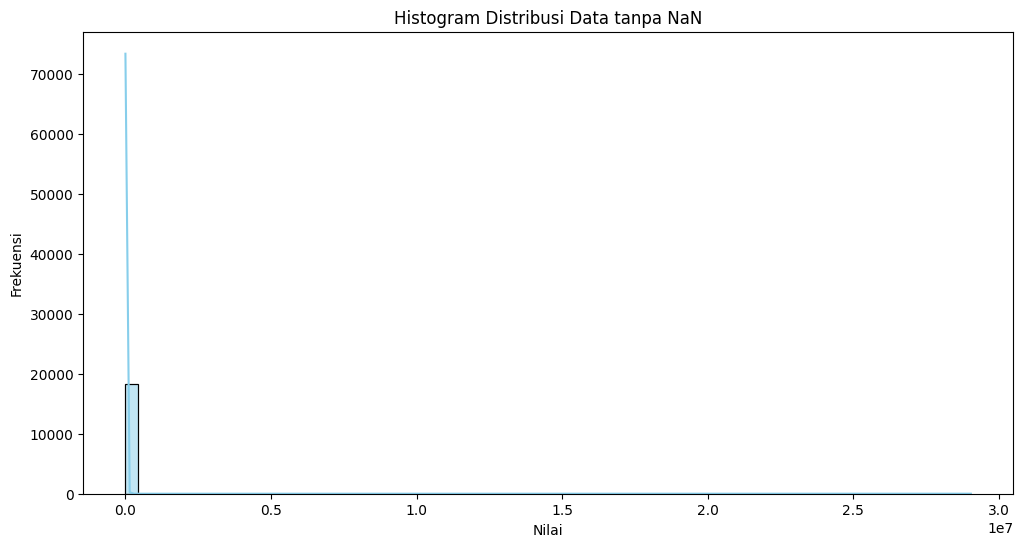

In [53]:
# Menghapus nilai NaN dari kolom 'gaji_rata-rata_perbulan'
data_without_nan = df_fill_naCon.dropna(subset=['gaji_rata-rata_perbulan'])

# Memvisualisasikan histogram setelah menghapus nilai NaN
plt.figure(figsize=(12, 6))
sns.histplot(data=data_without_nan, x='gaji_rata-rata_perbulan', bins=70, kde=True, color='skyblue')
plt.title('Histogram Distribusi Data tanpa NaN')
plt.xlabel('Nilai')
plt.ylabel('Frekuensi')
plt.show()

In [54]:
# Kelompokkan berdasarkan kolom 'id_industri' dan hitung median dari kolom 'gaji_rata-rata_perbulan'
group_median2 = df_fill_naCon.groupby('id_industri')['gaji_rata-rata_perbulan'].median()

# Mengisi nilai NaN dengan median yang sesuai dengan kelompoknya
for name, median_value in group_median2.items():
    df_fill_naCon.loc[df_fill_naCon['id_industri'] == name, 'gaji_rata-rata_perbulan'] = \
        df_fill_naCon.loc[df_fill_naCon['id_industri'] == name, 'gaji_rata-rata_perbulan'].fillna(median_value)

In [55]:
# Kelompokkan berdasarkan kolom 'jenis_pekerjaan_terformat' dan 'tingkat_pengalaman_terformat', dan hitung median dari kolom 'gaji_rata-rata_perbulan'
group_median3 = df_fill_naCon.groupby(['jenis_pekerjaan_terformat', 'tingkat_pengalaman_terformat'])['gaji_rata-rata_perbulan'].median()

# Mengisi nilai NaN dengan median yang sesuai dengan kelompoknya
for (jenis_pekerjaan_terformat, tingkat_pengalaman_terformat), median_value in group_median3.items():
    df_fill_naCon.loc[(df_fill_naCon['jenis_pekerjaan_terformat'] == jenis_pekerjaan_terformat) & 
                      (df_fill_naCon['tingkat_pengalaman_terformat'] == tingkat_pengalaman_terformat),
                      'gaji_rata-rata_perbulan'] = \
        df_fill_naCon.loc[(df_fill_naCon['jenis_pekerjaan_terformat'] == jenis_pekerjaan_terformat) & 
                          (df_fill_naCon['tingkat_pengalaman_terformat'] == tingkat_pengalaman_terformat), 
                          'gaji_rata-rata_perbulan'].fillna(median_value)

In [56]:
cek_missing_values(df_fill_naCon)

Missing Values pada setiap kolom:
id_pekerjaan                        0
id_perusahaan                       0
judul                               0
gaji_rata-rata_perbulan             0
gaji_maksimal                   27564
gaji_tengah                     40213
gaji_minimal                    27564
periode_pembayaran                  0
jenis_pekerjaan_terformat           0
lamaran                             0
diperbolehkan_jarak_jauh            0
tipe_pendaftaran                    0
tingkat_pengalaman_terformat        0
jenis_pekerjaan                     0
mata_uang                           0
tipe_kompensasi                     0
id_industri                         0
skill_1                             0
skill_2                             0
skill_3                             0
nama_industri                       0
nama_perusahaan                     0
negara                              0
jumlah_karyawan                     0
gaji_rata                       24764
dtype: int64


### **Droping Fitur**

Droping Fitur dilakukan karena missing values yang ada sangat banyak dan telah ada fitur lain yang dapat menggantikan informasi yang terdapat pada fitur yang di-drop. Namun fitur lain ini harus dilakukan Feature Engineering terlebih dahulu.

Daftar kolom yang harus didrop:
- `gaji_tengah`
- `gaji_minimal`
- `gaji_maksimal`
- `gaji_rata`


In [57]:
def drop_fitur(df, fitur):
    if isinstance(fitur, str):  # Jika hanya satu fitur yang ingin dijatuhkan
        df.drop(columns=[fitur], inplace=True)
    elif isinstance(fitur, list):  # Jika lebih dari satu fitur yang ingin dijatuhkan
        df.drop(columns=fitur, inplace=True)
    else:
        raise TypeError("Parameter 'fitur' harus berupa string atau list.")

In [58]:
df_drop_ft = df_fill_naCon.copy()

In [59]:
drop_fitur(df_drop_ft, ['gaji_tengah', 'gaji_minimal', 'gaji_maksimal', 'gaji_rata'])

In [60]:
cek_missing_values(df_drop_ft)

Missing Values pada setiap kolom:
id_pekerjaan                    0
id_perusahaan                   0
judul                           0
gaji_rata-rata_perbulan         0
periode_pembayaran              0
jenis_pekerjaan_terformat       0
lamaran                         0
diperbolehkan_jarak_jauh        0
tipe_pendaftaran                0
tingkat_pengalaman_terformat    0
jenis_pekerjaan                 0
mata_uang                       0
tipe_kompensasi                 0
id_industri                     0
skill_1                         0
skill_2                         0
skill_3                         0
nama_industri                   0
nama_perusahaan                 0
negara                          0
jumlah_karyawan                 0
dtype: int64


In [68]:
# df_drop_ft.to_csv('../Dataset/data_FP/clean_missing_values.csv', index=False)

# **Outliers**

## **Checking Outliers**

In [2]:
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

In [3]:
# Path file CSV
path_file_out = '../Dataset/data_FP/clean_missing_values.csv'

# Membaca file CSV ke dalam DataFrame
df_missing_fixed = pd.read_csv(path_file_out)

In [4]:
target_columns = ['id_industri']

In [5]:
# Pilih kolom-kolom numerik
columns_numeric = df_missing_fixed.select_dtypes(include=['int64', 'float64']).columns

# Eksklusikan kolom-kolom tertentu
columns_to_exclude = ['id_pekerjaan', 'id_perusahaan', 'id_industri', 'diperbolehkan_jarak_jauh']
columns_filtered = [col for col in columns_numeric if col not in columns_to_exclude]

In [6]:
def plot_boxplot(df, target_columns, figsize=(12, 8)):
    num_plots = len(target_columns)
    num_cols = 4 

    num_rows = num_plots // num_cols
    if num_plots % num_cols:
        num_rows += 1

    fig, axes = plt.subplots(num_rows, num_cols, figsize=figsize)

    for i, column in enumerate(target_columns):
        row = i // num_cols
        col = i % num_cols
        ax = axes[row, col] if num_rows > 1 else axes[col]

        sns.boxplot(y=df[column], ax=ax)
        ax.set_title(f'Boxplot {column}')

    for i in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes.flatten()[i])

    plt.tight_layout()
    plt.show()

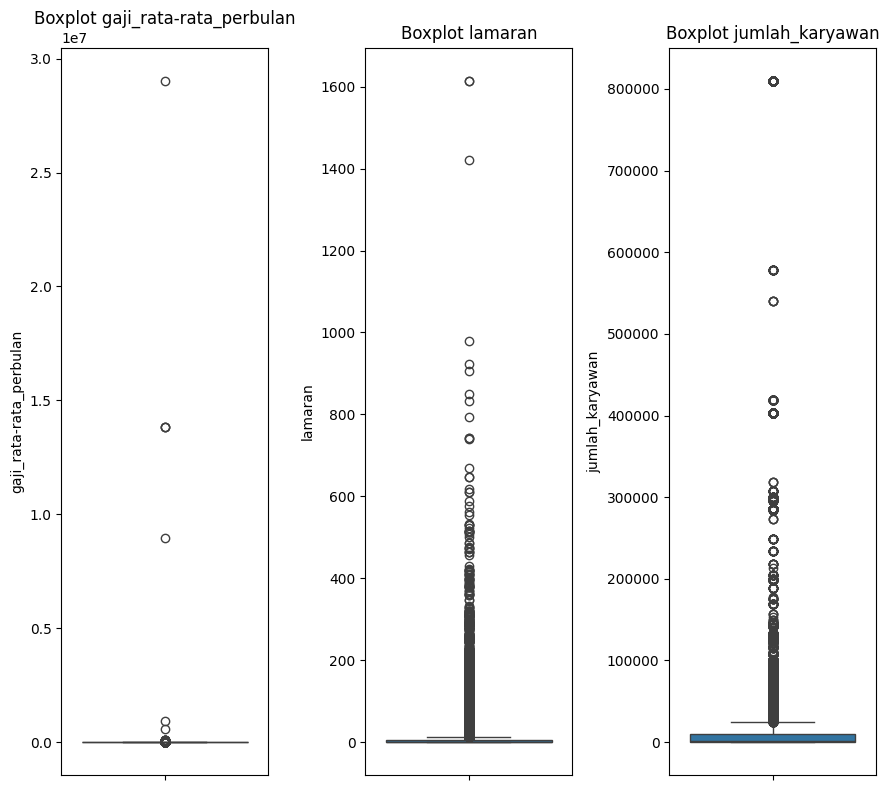

In [7]:
plot_boxplot(df_missing_fixed, columns_filtered)